<a href="https://colab.research.google.com/github/Sudarchanan/MachineLearning/blob/main/FeatureScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


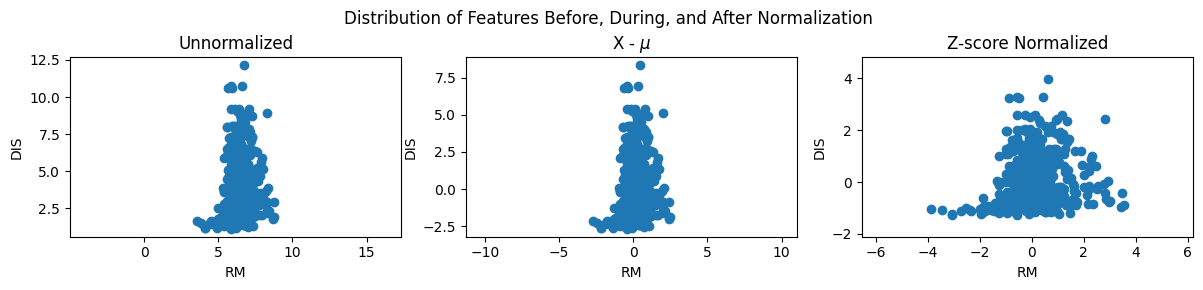

In [40]:
# === Import Libraries ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# === Load Dataset ===
dataset_file = "/content/drive/MyDrive/HousingData.csv"
df = pd.read_csv(dataset_file)
print("Sample Data:\n", df.head())

# === Features and Target ===
X_features = ['RM', 'DIS']
X_train = df[X_features]

# === Z-Score Normalization Function ===
def zscore_normalize_features(X):
    """
    Computes Z-score normalization for each feature column.

    Args:
        X (ndarray): Input data of shape (m, n)

    Returns:
        X_norm (ndarray): Normalized data
        mu (ndarray): Mean of each feature
        sigma (ndarray): Standard deviation of each feature
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# === Normalize Training Data ===
X_train_np = X_train.to_numpy()
X_mean = X_train_np - np.mean(X_train_np, axis=0)
X_norm, mu, sigma = zscore_normalize_features(X_train_np)

# === Plotting Function ===
def plot_feature_distributions(X_sets, titles, feature_names):
    fig, ax = plt.subplots(1, 3, figsize=(12, 3))
    for i, X in enumerate(X_sets):
        ax[i].scatter(X[:, 0], X[:, 1])
        ax[i].set_xlabel(feature_names[0])
        ax[i].set_ylabel(feature_names[1])
        ax[i].set_title(titles[i])
        ax[i].axis('equal')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle("Distribution of Features Before, During, and After Normalization")
    plt.show()

# === Plot Results ===
plot_feature_distributions(
    [X_train_np, X_mean, X_norm],
    ["Unnormalized", r"X - $\mu$", r"Z-score Normalized"],
    X_features
)
